# (Core) Resampling Datetime Data

Rodrigo Arguello-Serrano

## Part 1) Load the data and make a datetime index.
- Use the modified version of the data provided here:
     - Share URL: https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/edit?usp=sharing
     - Raw URL:
https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv 

>You must first load in the data and create a datetime index.

1. Convert the date column to datetime dtype.
2. Set the date column as the index.
3. Filter out only the required data:
    - Keep only data from the year 2000 or later.
    - Keep only the following features:
        - precipitation
        - mean_temp
        - min_temp
        - max_temp
        - snow_depth
4. Impute any missing values.
 - Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mdates

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

url ="london_weather_MODIFIED.xlsx"
df = pd.read_excel(url)
df.head(2)
df.name = 'london_weather_MODIFIED'

## Helper Function

In [2]:
def plot_dates(ts,
               figsize=(12,4),
               xtick_fontsize='large', 
               xtick_fontweight='bold',
               title= None, 
               format_dict=None,):## Make the fig and axis first
    if title is None:
        title = ts.name
    # plot the time series with pandas
    fig, ax = plt.subplots(figsize=figsize)
    ts.plot(ax=ax, title=title);
    
    if format_dict is not None:
        ## creating our tick locators and formatters
        ## for minor month ticks
        # create the locator to place ticks every 3 months.
        loc_months = mdates.MonthLocator(interval= format_dict['minor_loc_month'])
        fmt_months = mdates.DateFormatter(format_dict['minor_fmt_month'])
        # ## for major year ticks
        if format_dict['major_loc_year']:
            loc_year = mdates.YearLocator()
            fmt_year = mdates.DateFormatter(format_dict['major_fmt_year'])

        ## Change the font of the major ticks to stand out
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), 
                           fontsize=xtick_fontsize, 
                           fontweight=xtick_fontweight) 

        ## customize minor ticks
        ax.xaxis.set_minor_locator(loc_months)
        ax.xaxis.set_minor_formatter(fmt_months)
        # ## customize major ticks
        ax.xaxis.set_major_locator(loc_year)
        ax.xaxis.set_major_formatter(fmt_year)
        ## Making major/minor gridlines visually distinct
        ax.grid(which='minor',axis='x',ls=":")
        ax.grid(which='major',axis='x',color='k')
        ## rotate the dates
        fig.autofmt_xdate(which='major',rotation=45,ha='center')
    return fig,ax

## 1) Convert the date column to datetime dtype. 

In [3]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

## 2) Set the date column as the index. 

In [4]:
df = df.set_index('date')
df.head(2)

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0


## 3) Filter out only the required data:

- Keep only data from the year 2000 or later.
- Keep only the following features:
    - precipitation
    - mean_temp
    - min_temp 
    - max_temp 
    - snow_depth

In [5]:
df = df.loc[:, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]

df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
1979-01-01,0.4,-4.1,-7.5,2.3,9.0
1979-01-02,0.0,-2.6,-7.5,1.6,8.0
1979-01-03,0.0,-2.8,-7.2,1.3,4.0
1979-01-04,0.0,-2.6,-6.5,-0.3,2.0
1979-01-05,0.0,-0.8,-1.4,5.6,1.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


## 4) Impute any missing values.

In [6]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [7]:
## interpolating temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [8]:
df.isna().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

In [9]:
# filling preciptation/snow with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [10]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

## Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)
- For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
- Plot the feature that the question is asking about.
    - If there is a specific time period, plot only that time period. <br>
    
> Note: you may want to make a temporary DataFrame that you will use to answer this question only.

## Q1: What month had the most precipitation between 2000 through 2010?
- Resample the data as Monthly frequency.
- Find the date and corresponding value for the max precipitation.
- Plot the feature and time period that corresponds to the question.
    - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
    - Make sure to add a legend so that your label is visible.

### Q1 Visualization Requirements
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
        - With a title of "Precipitation for 2000-2010"
        - With a ylabel of "Inches"
- Customize the major xaxis ticks to:
    - Have major xaxis ticks every 1 year.
    - Use 4-digit years for the labels
    - Have the major ticks' labels rotated 90 degrees.
- Customize the minor xaxis ticks to:
    - Have minor xaxis ticks every 3 months
    - Do not label the minor ticks.

In [11]:
format_dict = { 'minor_loc_month': 3,
                'minor_fmt_month': "",
                'major_loc_year' : True,
                'major_fmt_year' : "%Y",
                'label_year_rotation':90,
}

In [12]:
ts = df.loc['2000':'2010','precipitation'].copy()
ts

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2010-12-27    5.0
2010-12-28    0.4
2010-12-29    1.4
2010-12-30    0.0
2010-12-31    0.0
Name: precipitation, Length: 4018, dtype: float64

In [13]:
ts_MS_res = ts.resample("MS").sum()
ts_MS_res.name = 'Resampled'
ts_MS_res.head()

date
2000-01-01    14.3
2000-02-01    62.2
2000-03-01    13.4
2000-04-01    71.8
2000-05-01    68.4
Freq: MS, Name: Resampled, dtype: float64

## Q1: What month had the most precipitation between 2000 through 2010?

In [14]:
date_max_precip = ts_MS_res.idxmax()
max_precip = ts_MS_res.max()

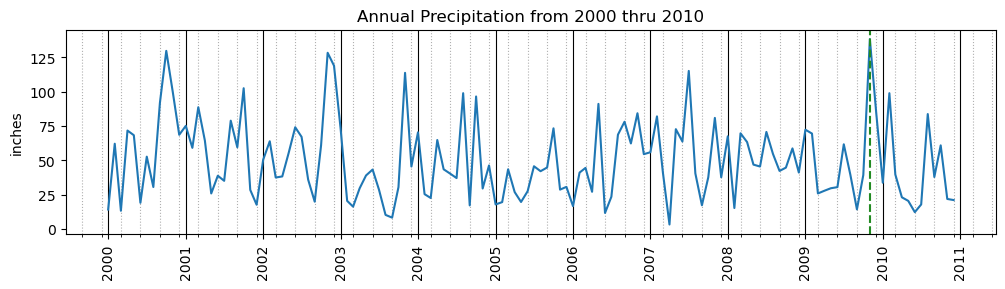

In [33]:
## creating our tick locators and formatters
## for minor month ticks
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("")
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")
## Make the fig and axis first
# plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(ts_MS_res.index,ts_MS_res.values)
plt.title("Annual Precipitation from 2000 thru 2010")
## customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)
## customize major ticks
ax.axvline(date_max_precip,color='forestgreen',ls='--', label= "Max Precipitation") 
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
ax.set_ylabel('inches')
fig.autofmt_xdate(rotation=90,ha='center')

In [16]:
print(f"The highest montly preciptation was {max_precip} inches, which occured on {date_max_precip.strftime('%B')} .")

The highest montly preciptation was 138.4 inches, which occured on November .


# Q2: Which year between 2000-2020 had the coolest average temperature?

In [17]:
ts_t = df.loc['2000':'2010','min_temp'].copy()


In [18]:
ts_Y_res = ts_t.resample("Y").min()
ts_Y_res.name = 'Year Resampled'
ts_Y_res.head()

date
2000-12-31   -5.5
2001-12-31   -4.3
2002-12-31   -5.3
2003-12-31   -5.1
2004-12-31   -4.8
Freq: A-DEC, Name: Year Resampled, dtype: float64

In [19]:
date_min_temp = ts_Y_res.idxmin()
min_temp = ts_Y_res.min()

In [20]:
print(f"The coolest year was {min_temp} inches, which occured on {date_min_temp.strftime('%Y')} .")

The coolest year was -9.4 inches, which occured on 2010 .


In [21]:
ts_Y_res = ts.resample("Y").mean()
ts_Y_res.name = 'Year Resampled'
ts_Y_res.head()

date
2000-12-31    1.974863
2001-12-31    1.850411
2002-12-31    2.060000
2003-12-31    1.261096
2004-12-31    1.622131
Freq: A-DEC, Name: Year Resampled, dtype: float64

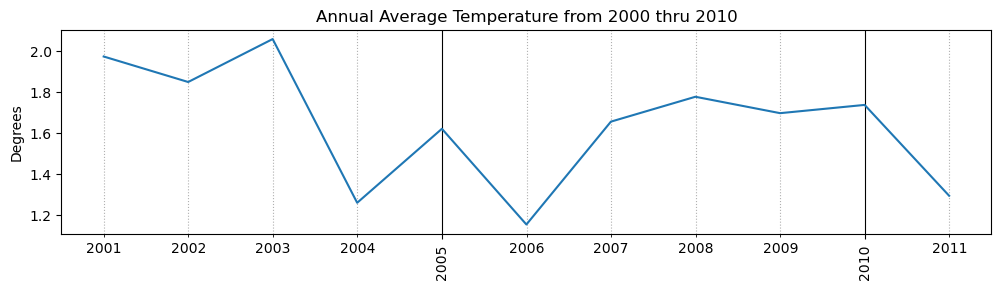

In [36]:
## creating our tick locators and formatters
## for minor month ticks
# create the locator to place ticks every 5 years.
loc_5y = mdates.YearLocator(5)
# fmt_years = mdates.DateFormatter("")
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")
## Make the fig and axis first
# plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(ts_Y_res.index,ts_Y_res.values)
plt.title("Annual Average Temperature from 2000 thru 2010")
## customize minor ticks
ax.xaxis.set_minor_locator(loc_year)
ax.xaxis.set_minor_formatter(fmt_year)
## customize major ticks
ax.xaxis.set_major_locator(loc_5y)
ax.xaxis.set_major_formatter(fmt_year)
## Making major/minor gridlines visually distinct
ax.set_ylabel('Degrees')
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

In [ ]:
## creating our tick locators and formatters
## for minor month ticks
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("")
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")
## Make the fig and axis first
# plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(ts_MS_res.index,ts_MS_res.values)
## customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)
## customize major ticks
ax.axvline(date_max_precip,color='forestgreen',ls='--', label= "Max Precipitation") 
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
ax.set_ylabel('inches')
fig.autofmt_xdate(rotation=90,ha='center')